<a href="https://colab.research.google.com/github/Balogun-Oluwatobi/Descriptive-Analysis-of-Vancouver-s-311-Service-Requests/blob/main/Vancouver%E2%80%99s_311_Service_Requests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd

# Define file paths for 2023 and 2024 datasets 
path_2023 = '/content/3-1-1-service-requests 2023.xlsx'
path_2024 = '/content/3-1-1-service-requests 2024.xlsx'

# Step 2: Load datasets into pandas DataFrames from Excel files
df_2023 = pd.read_excel(path_2023)
df_2024 = pd.read_excel(path_2024)

# Step 3: Inspect the first few rows of each dataset to ensure they are loaded correctly
print("First 5 rows of 2023 dataset:")
print(df_2023.head())

print("\nFirst 5 rows of 2024 dataset:")
print(df_2024.head())

# Step 4: Check for missing values in both datasets
print("\nMissing values in 2023 dataset:")
print(df_2023.isnull().sum())

print("\nMissing values in 2024 dataset:")
print(df_2024.isnull().sum())

# Step 5: Data Cleaning - Drop or fill missing values
# Let's assume that rows with missing data are dropped for simplicity in this step.
# Adjust this step if you need to impute missing values.
df_2023_cleaned = df_2023.dropna()
df_2024_cleaned = df_2024.dropna()

# Step 6: Check for duplicates in both datasets
print("\nNumber of duplicate rows in 2023 dataset:")
print(df_2023_cleaned.duplicated().sum())

print("\nNumber of duplicate rows in 2024 dataset:")
print(df_2024_cleaned.duplicated().sum())

# If there are duplicates, drop them
df_2023_cleaned = df_2023_cleaned.drop_duplicates()
df_2024_cleaned = df_2024_cleaned.drop_duplicates()

# Step 7: Summary of the cleaned data
print("\nSummary of cleaned 2023 dataset:")
print(df_2023_cleaned.info())

print("\nSummary of cleaned 2024 dataset:")
print(df_2024_cleaned.info())

# Step 8: Save cleaned datasets to new Excel files if needed
df_2023_cleaned.to_excel('/content/311_service_requests_2023_cleaned.xlsx', index=False)
df_2024_cleaned.to_excel('/content/311_service_requests_2024_cleaned.xlsx', index=False)

print("\nCleaned datasets saved successfully!")


First 5 rows of 2023 dataset:
           Department         Service request type Status  \
0  311 Contact Centre  City Services Feedback Case  Close   
1  311 Contact Centre  City Services Feedback Case  Close   
2  311 Contact Centre  City Services Feedback Case  Close   
3  311 Contact Centre  City Services Feedback Case  Close   
4  311 Contact Centre  City Services Feedback Case  Close   

                      Closure reason Service request open timestamp  \
0  Referred to another service group      2023-01-26T08:50:13+03:00   
1     Reviewed and no action planned      2023-01-26T21:20:16+03:00   
2                   Service provided      2023-01-26T23:33:40+03:00   
3                   Service provided      2023-01-26T23:35:25+03:00   
4                   Service provided      2023-12-22T03:31:07+03:00   

  Service request close date    Last modified timestamp            Address  \
0                 2023-01-25  2023-01-26T08:50:47+03:00        222 MAIN ST   
1                 20

In [ ]:
# Step 2: Import necessary libraries for descriptive analysis
import pandas as pd

# Load cleaned datasets (assuming they're saved in Excel)
path_cleaned_2023 = '/content/311_service_requests_2023_cleaned.xlsx'
path_cleaned_2024 = '/content/311_service_requests_2024_cleaned.xlsx'

df_2023 = pd.read_excel(path_cleaned_2023)
df_2024 = pd.read_excel(path_cleaned_2024)

# Combine 2023 and 2024 datasets for an overall analysis
df_combined = pd.concat([df_2023, df_2024])

# Descriptive Statistics

# 1. Total service requests by year
total_requests_2023 = df_2023.shape[0]
total_requests_2024 = df_2024.shape[0]

print(f"Total service requests in 2023: {total_requests_2023}")
print(f"Total service requests in 2024: {total_requests_2024}")

# 2. Distribution of service request types
request_type_distribution_2023 = df_2023['Service request type'].value_counts()
request_type_distribution_2024 = df_2024['Service request type'].value_counts()

print("\nTop 5 service request types in 2023:")
print(request_type_distribution_2023.head())

print("\nTop 5 service request types in 2024:")
print(request_type_distribution_2024.head())

# 3. Status distribution (Open, Closed, etc.)
status_distribution_2023 = df_2023['Status'].value_counts()
status_distribution_2024 = df_2024['Status'].value_counts()

print("\nStatus distribution in 2023:")
print(status_distribution_2023)

print("\nStatus distribution in 2024:")
print(status_distribution_2024)

# 4. Average request duration (corrected for timezone issues)

# Convert 'Service request open timestamp' and 'Service request close date' to datetime and remove timezone info
df_2023['Service request open timestamp'] = pd.to_datetime(df_2023['Service request open timestamp']).dt.tz_localize(None)
df_2023['Service request close date'] = pd.to_datetime(df_2023['Service request close date'], errors='coerce').dt.tz_localize(None)  # Handle missing values

df_2024['Service request open timestamp'] = pd.to_datetime(df_2024['Service request open timestamp']).dt.tz_localize(None)
df_2024['Service request close date'] = pd.to_datetime(df_2024['Service request close date'], errors='coerce').dt.tz_localize(None)

# Calculate request duration in days for each request
df_2023['Request Duration (Days)'] = (df_2023['Service request close date'] - df_2023['Service request open timestamp']).dt.days
df_2024['Request Duration (Days)'] = (df_2024['Service request close date'] - df_2024['Service request open timestamp']).dt.days

# Calculate average request duration for both years
avg_duration_2023 = df_2023['Request Duration (Days)'].mean()
avg_duration_2024 = df_2024['Request Duration (Days)'].mean()

print(f"\nAverage request duration in 2023: {avg_duration_2023:.2f} days")
print(f"Average request duration in 2024: {avg_duration_2024:.2f} days")

# 5. Distribution of service requests by submission channel
channel_distribution_2023 = df_2023['Channel'].value_counts()
channel_distribution_2024 = df_2024['Channel'].value_counts()

print("\nService request submission channels in 2023:")
print(channel_distribution_2023)

print("\nService request submission channels in 2024:")
print(channel_distribution_2024)

# 6. Geographic distribution by Local Area (Top 5 regions)
local_area_distribution_2023 = df_2023['Local area'].value_counts().head(5)
local_area_distribution_2024 = df_2024['Local area'].value_counts().head(5)

print("\nTop 5 local areas with the most service requests in 2023:")
print(local_area_distribution_2023)

print("\nTop 5 local areas with the most service requests in 2024:")
print(local_area_distribution_2024)

# Optional: Combine 2023 and 2024 for total descriptive stats
total_request_distribution = df_combined['Service request type'].value_counts()
total_status_distribution = df_combined['Status'].value_counts()

print("\nOverall top service request types (2023 and 2024 combined):")
print(total_request_distribution.head())

print("\nOverall status distribution (2023 and 2024 combined):")
print(total_status_distribution)


Total service requests in 2023: 5658
Total service requests in 2024: 3549

Top 5 service request types in 2023:
Service request type
City Services Feedback Case    5658
Name: count, dtype: int64

Top 5 service request types in 2024:
Service request type
City Services Feedback Case    3549
Name: count, dtype: int64

Status distribution in 2023:
Status
Close    5658
Name: count, dtype: int64

Status distribution in 2024:
Status
Close    3549
Name: count, dtype: int64

Average request duration in 2023: 11.22 days
Average request duration in 2024: 13.58 days

Service request submission channels in 2023:
Channel
Phone           5437
Chat             135
E-mail            45
Social Media      40
Mail Out           1
Name: count, dtype: int64

Service request submission channels in 2024:
Channel
Phone           3463
Chat              62
Social Media      11
E-mail            11
Mail               1
Mail Out           1
Name: count, dtype: int64

Top 5 local areas with the most service request

In [ ]:
# Step 2: Import necessary libraries for descriptive analysis
import pandas as pd

# Load cleaned datasets (assuming they're saved in Excel)
path_cleaned_2023 = '/content/311_service_requests_2023_cleaned.xlsx'
path_cleaned_2024 = '/content/311_service_requests_2024_cleaned.xlsx'

df_2023 = pd.read_excel(path_cleaned_2023)
df_2024 = pd.read_excel(path_cleaned_2024)

# Combine 2023 and 2024 datasets for overall analysis
df_combined = pd.concat([df_2023, df_2024])

# 1. Total number of service requests for 2023 and 2024
total_requests_2023 = df_2023.shape[0]
total_requests_2024 = df_2024.shape[0]

print(f"Total service requests in 2023: {total_requests_2023}")
print(f"Total service requests in 2024: {total_requests_2024}")

# 2. Average request duration (time between open and close dates)
# Convert open and close date columns to datetime format and handle timezones
df_combined['Service request open timestamp'] = pd.to_datetime(df_combined['Service request open timestamp']).dt.tz_localize(None)
df_combined['Service request close date'] = pd.to_datetime(df_combined['Service request close date'], errors='coerce').dt.tz_localize(None)

# Calculate request duration in days for each request
df_combined['Request Duration (Days)'] = (df_combined['Service request close date'] - df_combined['Service request open timestamp']).dt.days

# Calculate the average request duration
avg_request_duration = df_combined['Request Duration (Days)'].mean()
print(f"Average request duration (2023 and 2024 combined): {avg_request_duration:.2f} days")

# 3. Service request completion rate by department (percentage of closed vs. open requests)
# Calculate the number of requests by status for each department
completion_rate_by_department = df_combined.groupby('Department')['Status'].value_counts(normalize=True).unstack(fill_value=0)
completion_rate_by_department['Completion Rate (Closed)'] = completion_rate_by_department.get('Close', 0) * 100  # convert to percentage

print("\nService request completion rate by department:")
print(completion_rate_by_department[['Completion Rate (Closed)']])

# 4. Distribution of service requests by type (most common issues)
service_request_type_distribution = df_combined['Service request type'].value_counts()
print("\nTop 5 service request types:")
print(service_request_type_distribution.head())

# 5. Frequency of service requests by submission channel
submission_channel_distribution = df_combined['Channel'].value_counts()
print("\nService request submission channels distribution:")
print(submission_channel_distribution)

# 6. Service request counts by local area to identify high-demand regions
service_request_by_area = df_combined['Local area'].value_counts()
print("\nTop 5 local areas with the most service requests:")
print(service_request_by_area.head())

# 7. Top 5 closure reasons (why requests are closed most often)
closure_reason_distribution = df_combined['Closure reason'].value_counts()
print("\nTop 5 closure reasons:")
print(closure_reason_distribution.head())



Total service requests in 2023: 5658
Total service requests in 2024: 3549
Average request duration (2023 and 2024 combined): 12.13 days

Service request completion rate by department:
Status              Completion Rate (Closed)
Department                                  
311 Contact Centre                     100.0

Top 5 service request types:
Service request type
City Services Feedback Case    9207
Name: count, dtype: int64

Service request submission channels distribution:
Channel
Phone           8900
Chat             197
E-mail            56
Social Media      51
Mail Out           2
Mail               1
Name: count, dtype: int64

Top 5 local areas with the most service requests:
Local area
Downtown                    884
Kitsilano                   809
Kensington-Cedar Cottage    652
Mount Pleasant              628
Fairview                    555
Name: count, dtype: int64

Top 5 closure reasons:
Closure reason
Service provided                                  4532
Closed automati

In [ ]:
!pip install matplotlib seaborn folium


<ipython-input-10-fed9adc4e44a>:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_2023['Month'] = df_2023['Service request open timestamp'].dt.to_period('M')
<ipython-input-10-fed9adc4e44a>:19: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_2024['Month'] = df_2024['Service request open timestamp'].dt.to_period('M')


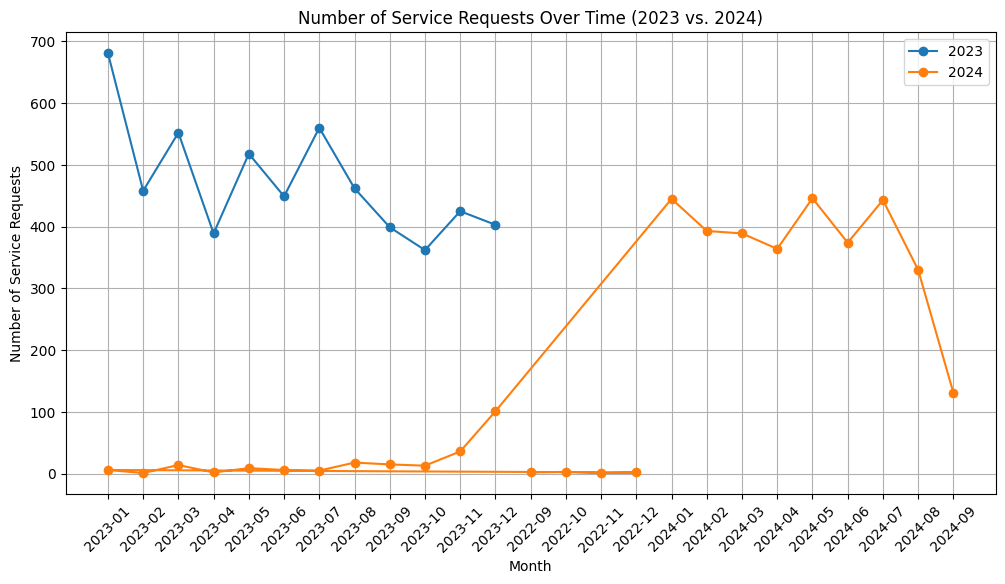

In [ ]:
# Step 3: Import necessary libraries for visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned datasets
path_cleaned_2023 = '/content/311_service_requests_2023_cleaned.xlsx'
path_cleaned_2024 = '/content/311_service_requests_2024_cleaned.xlsx'

df_2023 = pd.read_excel(path_cleaned_2023)
df_2024 = pd.read_excel(path_cleaned_2024)

# Convert 'Service request open timestamp' to datetime
df_2023['Service request open timestamp'] = pd.to_datetime(df_2023['Service request open timestamp'])
df_2024['Service request open timestamp'] = pd.to_datetime(df_2024['Service request open timestamp'])

# 1. Time series graph: Number of service requests over time (monthly breakdown)
df_2023['Month'] = df_2023['Service request open timestamp'].dt.to_period('M')
df_2024['Month'] = df_2024['Service request open timestamp'].dt.to_period('M')

requests_per_month_2023 = df_2023.groupby('Month').size()
requests_per_month_2024 = df_2024.groupby('Month').size()

plt.figure(figsize=(12, 6))
plt.plot(requests_per_month_2023.index.astype(str), requests_per_month_2023, marker='o', label='2023')
plt.plot(requests_per_month_2024.index.astype(str), requests_per_month_2024, marker='o', label='2024')
plt.title('Number of Service Requests Over Time (2023 vs. 2024)')
plt.xlabel('Month')
plt.ylabel('Number of Service Requests')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()




<ipython-input-11-9ca6457c1372>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=service_request_type_2023.values, y=service_request_type_2023.index, ax=axs[0], palette="Blues_d")
<ipython-input-11-9ca6457c1372>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=service_request_type_2024.values, y=service_request_type_2024.index, ax=axs[1], palette="Greens_d")


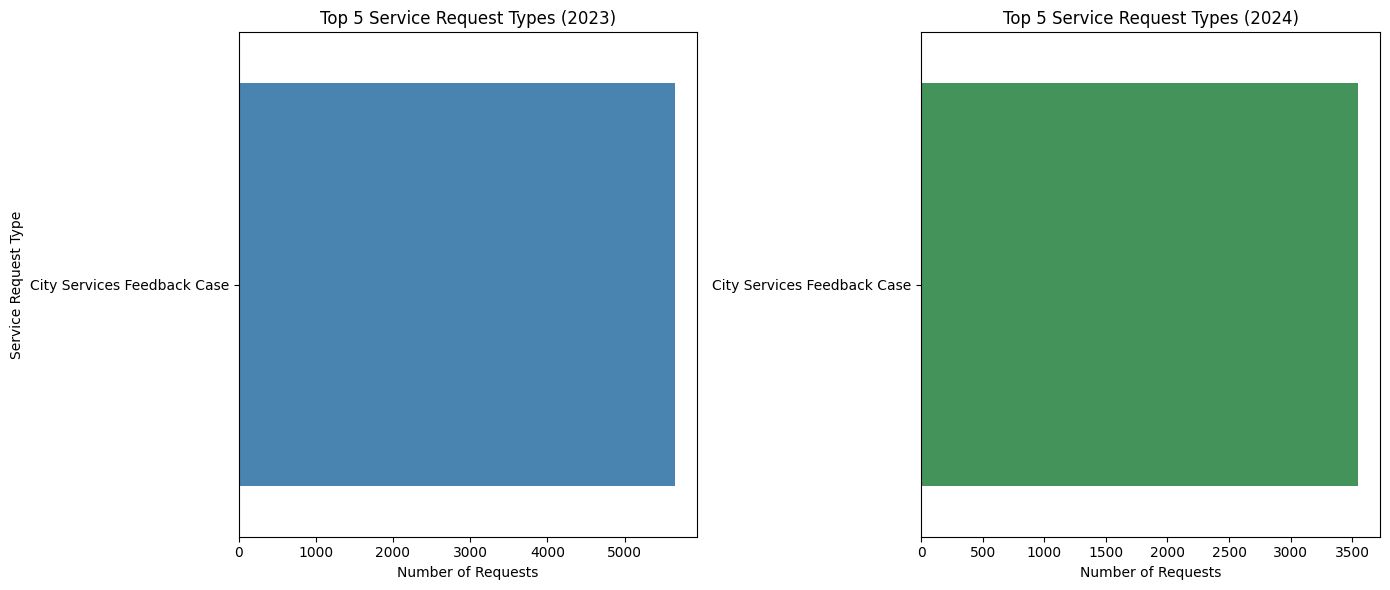

In [ ]:
#Bar chart: Top 5 most frequent service request types (2023 vs. 2024)
service_request_type_2023 = df_2023['Service request type'].value_counts().head(5)
service_request_type_2024 = df_2024['Service request type'].value_counts().head(5)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for 2023
sns.barplot(x=service_request_type_2023.values, y=service_request_type_2023.index, ax=axs[0], palette="Blues_d")
axs[0].set_title('Top 5 Service Request Types (2023)')
axs[0].set_xlabel('Number of Requests')
axs[0].set_ylabel('Service Request Type')

# Bar chart for 2024
sns.barplot(x=service_request_type_2024.values, y=service_request_type_2024.index, ax=axs[1], palette="Greens_d")
axs[1].set_title('Top 5 Service Request Types (2024)')
axs[1].set_xlabel('Number of Requests')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()


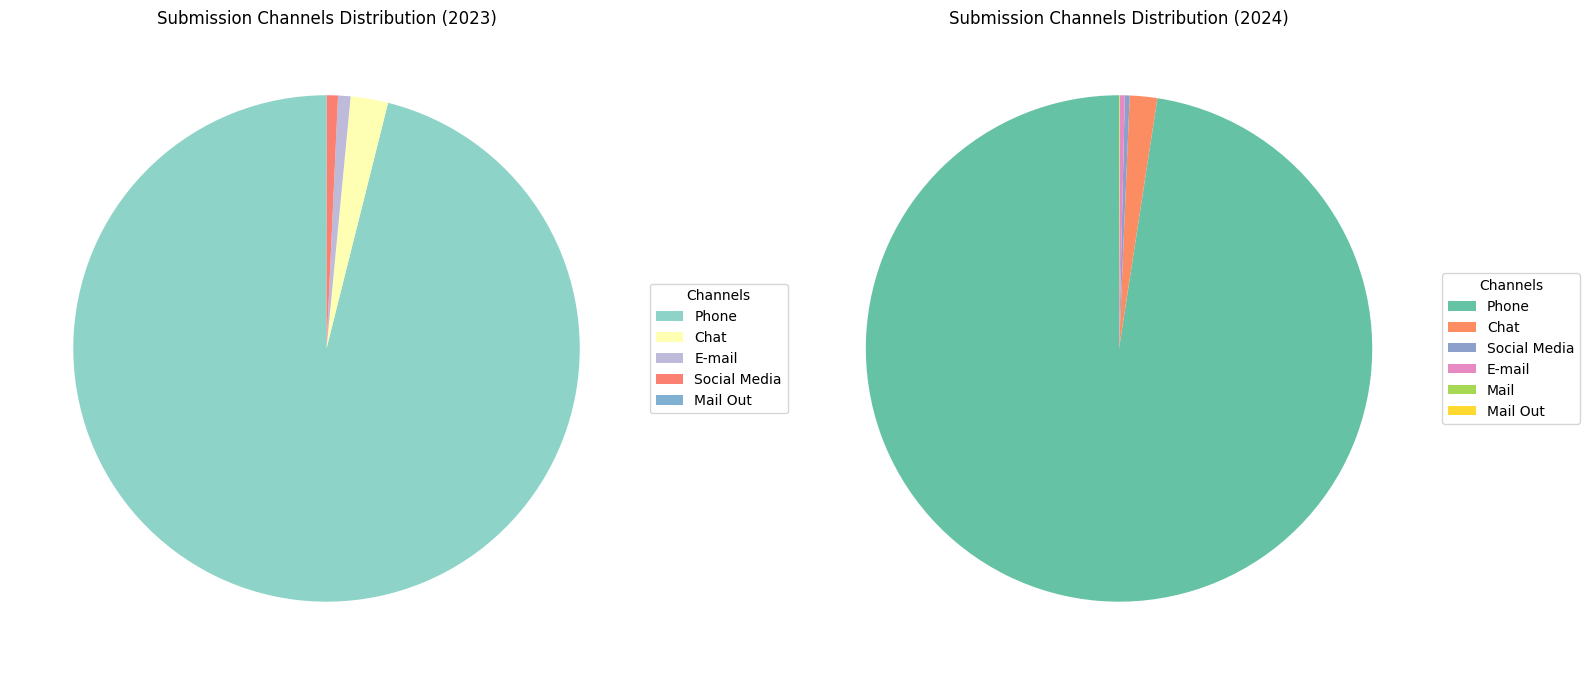

In [ ]:
# 3. Pie charts: Share of submission channels (2023 vs. 2024)
channel_distribution_2023 = df_2023['Channel'].value_counts()
channel_distribution_2024 = df_2024['Channel'].value_counts()

# Increase figure size for better visibility
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for 2023 without labels inside the chart
wedges_2023, texts_2023 = axs[0].pie(
    channel_distribution_2023,
    startangle=90,
    colors=sns.color_palette('Set3')
)
axs[0].set_title('Submission Channels Distribution (2023)')

# Add a legend outside the pie chart
axs[0].legend(wedges_2023, channel_distribution_2023.index, title="Channels", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Pie chart for 2024 without labels inside the chart
wedges_2024, texts_2024 = axs[1].pie(
    channel_distribution_2024,
    startangle=90,
    colors=sns.color_palette('Set2')
)
axs[1].set_title('Submission Channels Distribution (2024)')

# Add a legend outside the pie chart
axs[1].legend(wedges_2024, channel_distribution_2024.index, title="Channels", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Ensure the layout is spaced properly
plt.tight_layout()

# Show the plot
plt.show()




Summary Statistics for Request Duration (in Days):
count    9207.000000
mean       12.133920
std        47.320375
min        -2.000000
25%        -1.000000
50%         1.000000
75%         6.000000
max       653.000000
Name: Request Duration (Days), dtype: float64


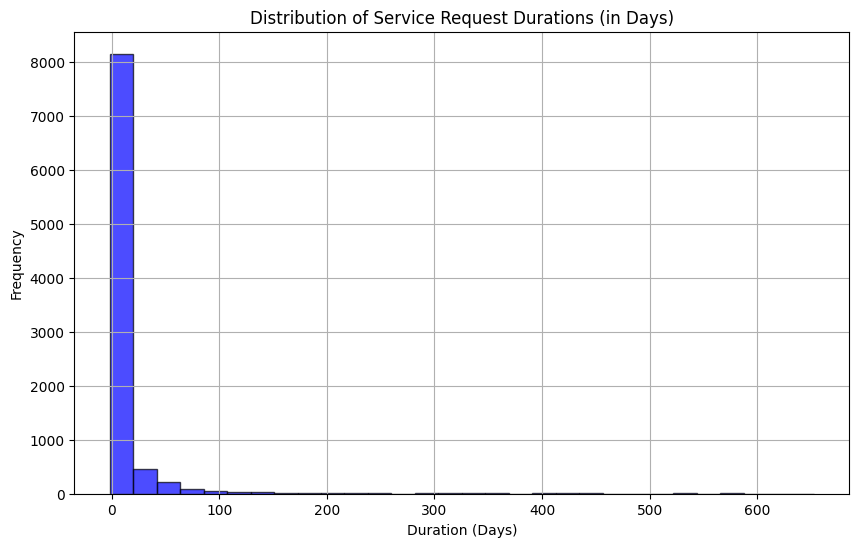

In [ ]:
# Ensure 'Service request open timestamp' and 'Service request close date' are tz-naive
df_combined['Service request open timestamp'] = pd.to_datetime(df_combined['Service request open timestamp']).dt.tz_localize(None)
df_combined['Service request close date'] = pd.to_datetime(df_combined['Service request close date'], errors='coerce').dt.tz_localize(None)

# Calculate the request duration in days
df_combined['Request Duration (Days)'] = (df_combined['Service request close date'] - df_combined['Service request open timestamp']).dt.days

# Filter out rows with NaN values for request duration
df_combined_clean = df_combined.dropna(subset=['Request Duration (Days)'])

# Show some statistics on the request duration
print("Summary Statistics for Request Duration (in Days):")
print(df_combined_clean['Request Duration (Days)'].describe())

# Visualization: Histogram of Request Duration
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_combined_clean['Request Duration (Days)'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Service Request Durations (in Days)')
plt.xlabel('Duration (Days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<ipython-input-18-ce0b50c5b5a1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=local_area_2023.values, y=local_area_2023.index, ax=axs[0], palette="Purples_d")
<ipython-input-18-ce0b50c5b5a1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=local_area_2024.values, y=local_area_2024.index, ax=axs[1], palette="Oranges_d")


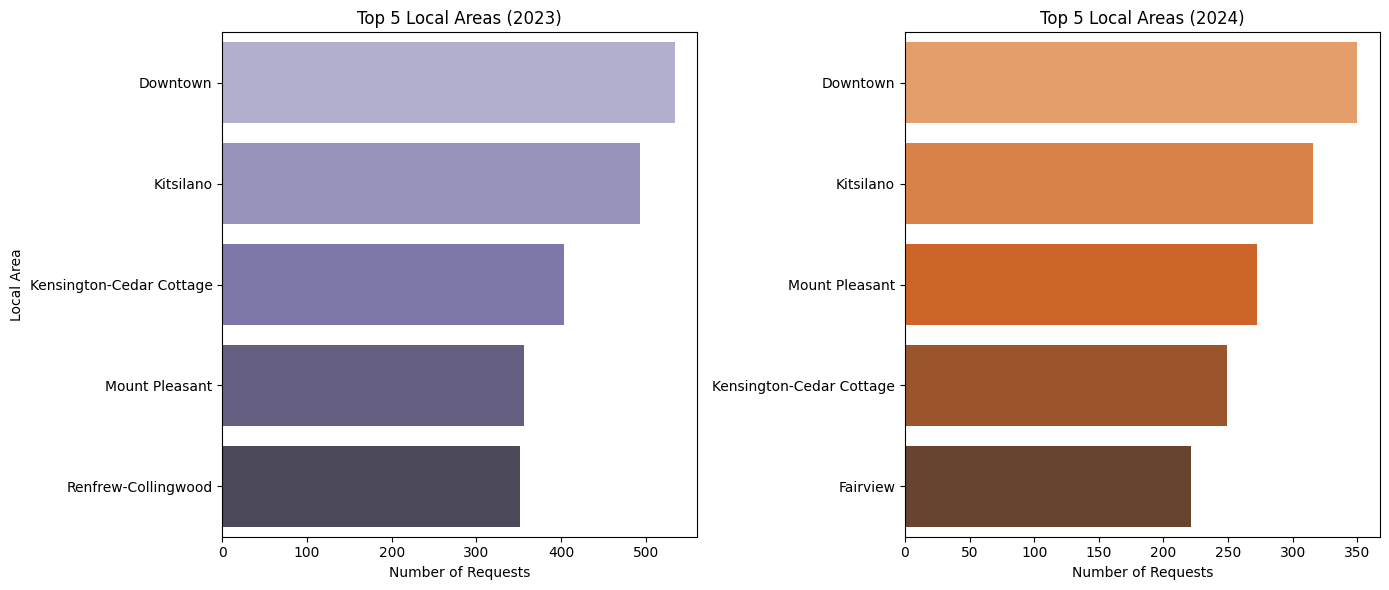

In [ ]:
# 5. Local Area distribution comparison: Top 5 most frequent areas (2023 vs. 2024)
local_area_2023 = df_2023['Local area'].value_counts().head(5)
local_area_2024 = df_2024['Local area'].value_counts().head(5)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for 2023
sns.barplot(x=local_area_2023.values, y=local_area_2023.index, ax=axs[0], palette="Purples_d")
axs[0].set_title('Top 5 Local Areas (2023)')
axs[0].set_xlabel('Number of Requests')
axs[0].set_ylabel('Local Area')

# Bar chart for 2024
sns.barplot(x=local_area_2024.values, y=local_area_2024.index, ax=axs[1], palette="Oranges_d")
axs[1].set_title('Top 5 Local Areas (2024)')
axs[1].set_xlabel('Number of Requests')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()